In [18]:
#import and setup
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.stats import linregress

finn_key = 'cc7v412ad3i03fardc90'

#import finnhub
import finnhub
finnhub_client = finnhub.Client(api_key=finn_key)

#finnhub utcdate codes for slicing by year for each stock
#2019 times
beg_2019 = 1546300800
end_2019 = 1577836799
#2020 times
beg_2020 = 1577836800
end_2020 = 1609459199
#2021 times
beg_2021 = 1609459200
end_2021 = 1640995199


In [3]:
#def function to create a dataframe for each stock
def stock_df(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'W', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name

In [88]:
#def function to create a stock chart for the price/date and volume
def plot_chart_covid(dataframe, stock_name, year):
    fig= plt.figure(figsize=(12,10))
    top_plt = plt.subplot2grid((7,4), (0,0), rowspan=3, colspan=4)
    top_plt.plot(dataframe.index, dataframe['Close'], color = '#74D3AE')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Stock Price')
    plt.title(f'{stock_name} Performance Over the Year {year}')
    middle_plt = plt.subplot2grid((7,4),(3,0), rowspan=2, colspan=4)
    middle_plt.bar(dataframe.index, dataframe['Cumulative_cases'], color='#DD9787')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Cumulative Cases by Millions')
    bottom_plt = plt.subplot2grid((7,4),(5,0), rowspan=2, colspan=4)
    bottom_plt.bar(dataframe.index, dataframe['Volume'], color='#8A89C0')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Trading Volume by Millions')
    # plt.tight_layout();
    plt.close(fig) #added after saving/checking figs
    
def plot_chart(dataframe, stock_name, year):
    fig= plt.figure(figsize=(12,10))
    top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
    top_plt.plot(dataframe.index, dataframe['Close'],color='#74D3AE')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Stock Price')
    plt.title(f'{stock_name} Performance Over the Year {year}')
    bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
    bottom_plt.bar(dataframe.index, dataframe['Volume'],color='#8A89C0')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Trading Volume by Millions')
    # plt.tight_layout();
    plt.close(fig) #added after saving/checking figs

In [5]:
#importing randomly chosen stocks by each industry with no bias
unbias_stock_df = pd.read_csv('./random_stock_selection/output/ten_industry_df.csv')
            #unbias_stock_df

#importing covid data from 2020 and 2021
covid20_df = pd.read_csv('Covid_files/WHO-US-Covid20.csv')
covid20_df = covid20_df.rename(columns = {"Date_reported" : "Time"})
covid21_df = pd.read_csv('Covid_files/WHO-US-Covid21.csv')
covid21_df = covid21_df.rename(columns = {"Date_reported" : "Time"})

In [6]:
#creating a list of tickers
tickers = []
for index,row in unbias_stock_df.iterrows():
    tickers.append(row['Ticker'])
print(tickers)
# the finnhub api does not display any data for Unity Software
# inplace of Unity, we have decided to just grab the highest marketcap in the Tech Sector which is Microsoft
tickers.pop(-1) #removes 'U'
tickers.append('MSFT') #add msft ticker manually
print(tickers)

#using the list of tickers we create a dictionary of each ticker by year as the key and its data frame as the value
ticker_2019_data = {}
#no 2019 covid data in the US
ticker_2020_data = {}
ticker_covid_2020 = {}
ticker_2021_data = {}
ticker_covid_2021= {}
for ticker in tickers:
    ticker_2019_data[f'{ticker}_2019'] = stock_df(ticker, beg_2019, end_2019)
    ticker_2020_data[f'{ticker}_2020'] = stock_df(ticker, beg_2020, end_2020)
    ticker_covid_2020[f'{ticker}_covid_2020'] = pd.merge(ticker_2020_data[f'{ticker}_2020'], covid20_df, how='left',on='Time').set_index('Time')
    ticker_2021_data[f'{ticker}_2021'] = stock_df(ticker, beg_2021, end_2021)
    ticker_covid_2021[f'{ticker}_covid_2021'] = pd.merge(ticker_2021_data[f'{ticker}_2021'], covid21_df, how='left',on='Time').set_index('Time')
    #setting the index of each ticker data to time after merging
    ticker_2019_data[f'{ticker}_2019'] = ticker_2019_data[f'{ticker}_2019'].set_index('Time')
    ticker_2020_data[f'{ticker}_2020'] = ticker_2020_data[f'{ticker}_2020'].set_index('Time')
    ticker_2021_data[f'{ticker}_2021'] = ticker_2021_data[f'{ticker}_2021'].set_index('Time')

['UAL', 'DAL', 'TSLA', 'GM', 'CLX', 'EL', 'ALGN', 'MCK', 'LVS', 'MGM', 'FDX', 'UPS', 'VTRS', 'CTLT', 'EQIX', 'PSA', 'TMUS', 'VZ', 'AAPL', 'U']
['UAL', 'DAL', 'TSLA', 'GM', 'CLX', 'EL', 'ALGN', 'MCK', 'LVS', 'MGM', 'FDX', 'UPS', 'VTRS', 'CTLT', 'EQIX', 'PSA', 'TMUS', 'VZ', 'AAPL', 'MSFT']


In [89]:
#using a for loop to create a plot and then saving it.
#after saving, comment out the savefig and use plt.close() to no longer display the plots
#by commenting out the plt.savefig it wont be saving a blank plot
count = 0
for key in ticker_2019_data:
    plot_chart(ticker_2019_data[key],tickers[count],2019)
    # plt.savefig(f'Plotted_Images/2019_ticker_performance/{tickers[count]}_2019')
    count += 1
count = 0
for key in ticker_2020_data:
    plot_chart(ticker_2020_data[key],tickers[count],2020)
    # plt.savefig(f'Plotted_Images/2020_ticker_performance/{tickers[count]}_2020')
    count += 1
count = 0
for key in ticker_covid_2020:
    plot_chart_covid(ticker_covid_2020[key],tickers[count],2020)
    # plt.savefig(f'Plotted_Images/2020_covid_ticker/{tickers[count]}_covid_2020')
    count += 1
count = 0
for key in ticker_2021_data:
    plot_chart(ticker_2021_data[key],tickers[count],2021)
    # plt.savefig(f'Plotted_Images/2021_ticker_performance/{tickers[count]}_2021')
    count += 1
count = 0
for key in ticker_covid_2021:
    plot_chart_covid(ticker_covid_2021[key],tickers[count],2021)
    # plt.savefig(f'Plotted_Images/2021_covid_ticker/{tickers[count]}_covid_2021')
    count += 1

In [63]:
def plot_lin_regression(x_values,y_values,xtitle,ytitle,ticker, x_coord, y_coord):
    #lin regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plotting
    fig= plt.figure(figsize=(12,10))
    plt.title(f'{ticker} Price Prediction During Covid')
    plt.plot(x_values, y_values)
    plt.plot(x_values, regress_value, 'r-')
    plt.annotate(line_equation, (x_coord, y_coord), fontsize = 15, color = "red")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.xlim([min(x_values),max(x_values)])
    plt.grid(True)

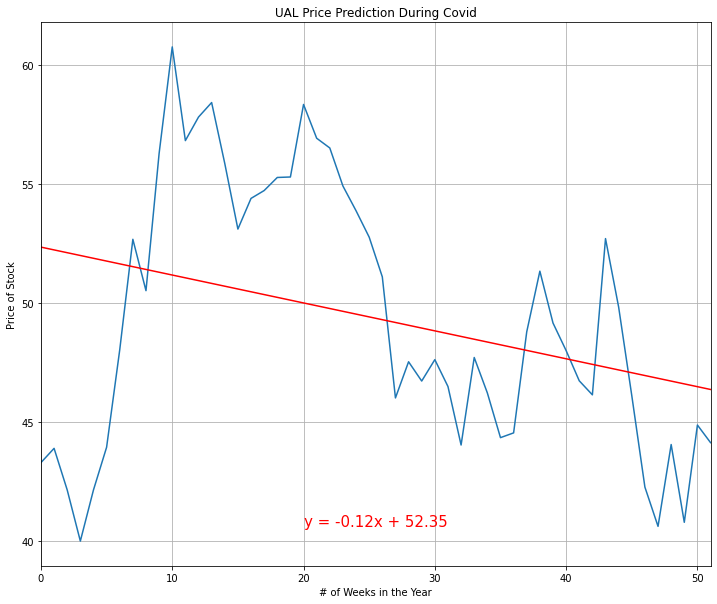

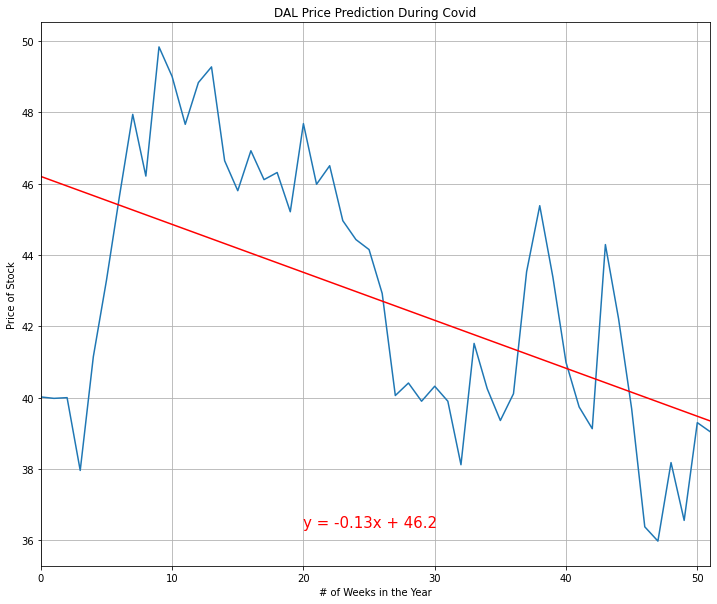

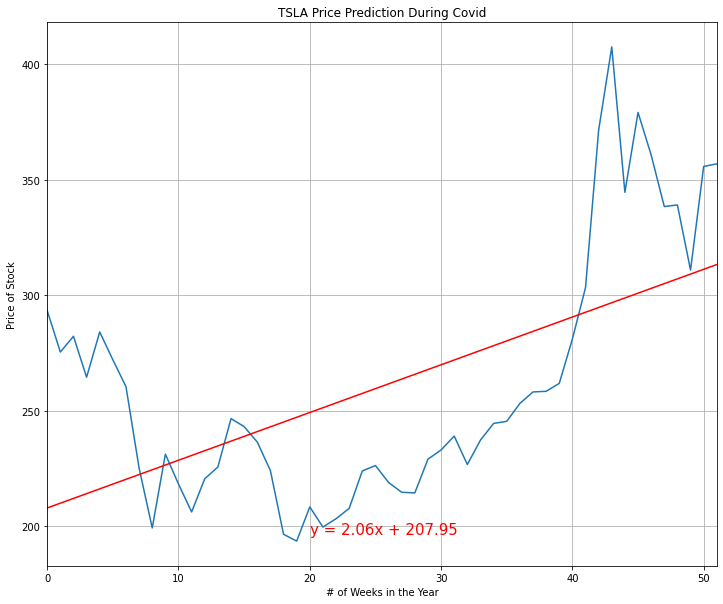

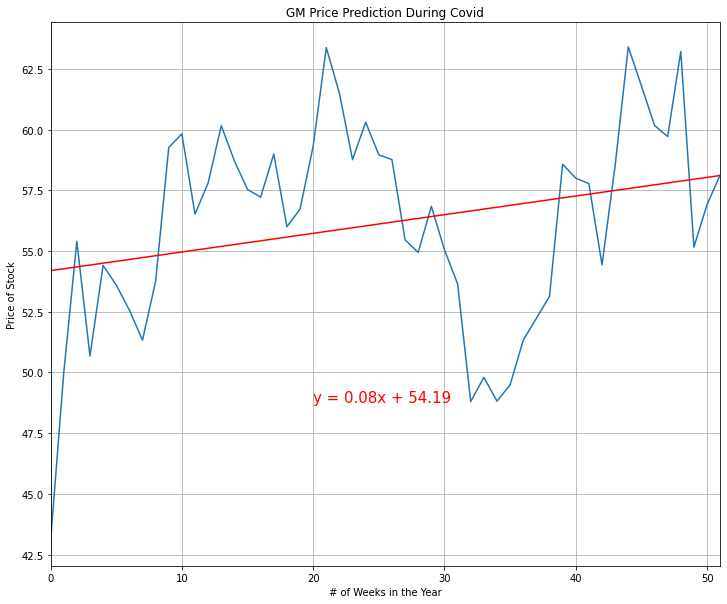

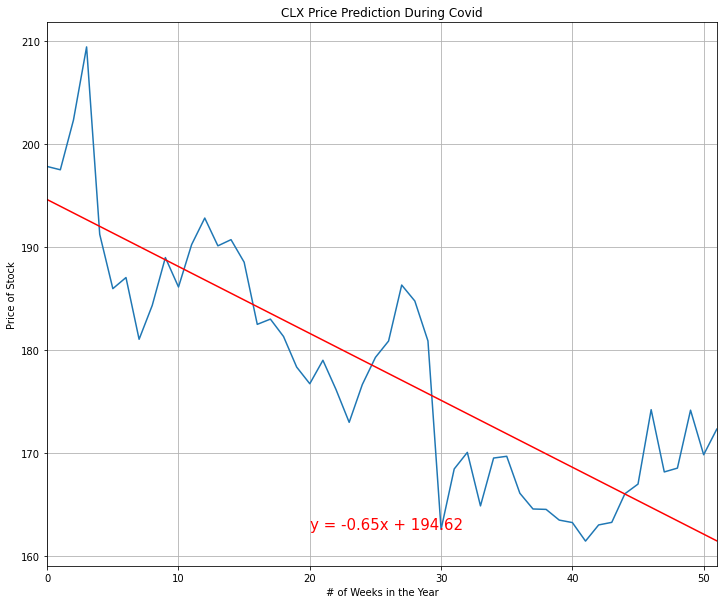

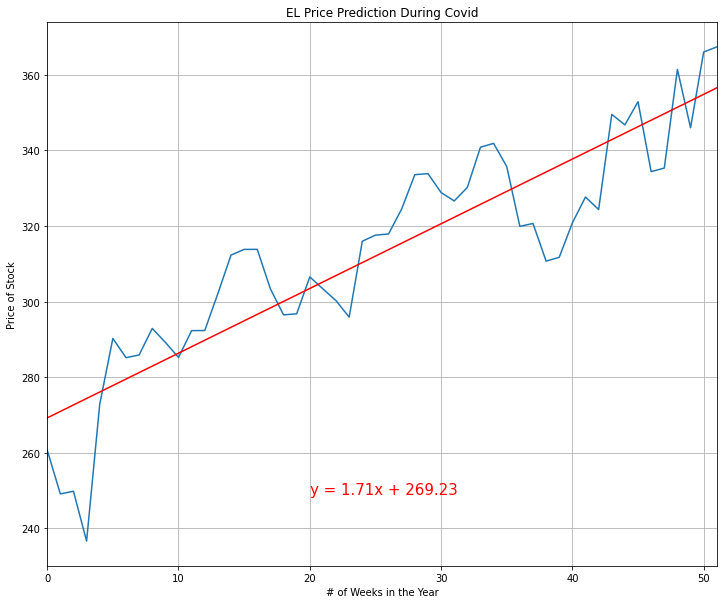

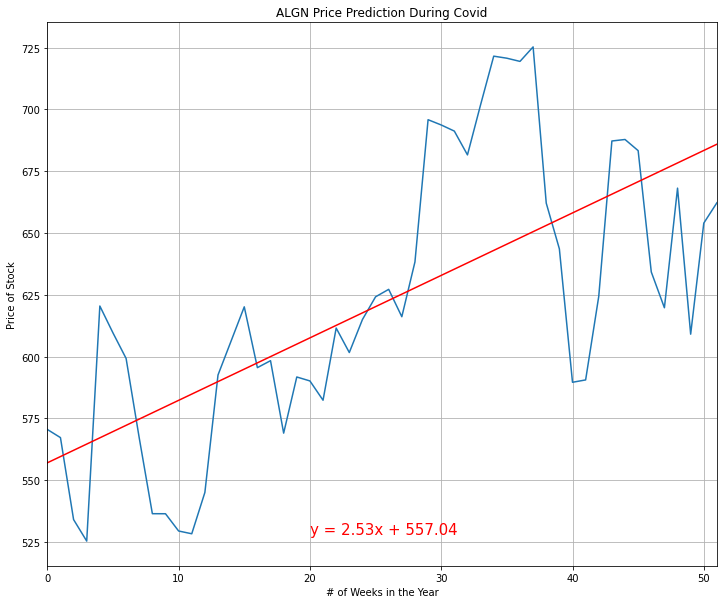

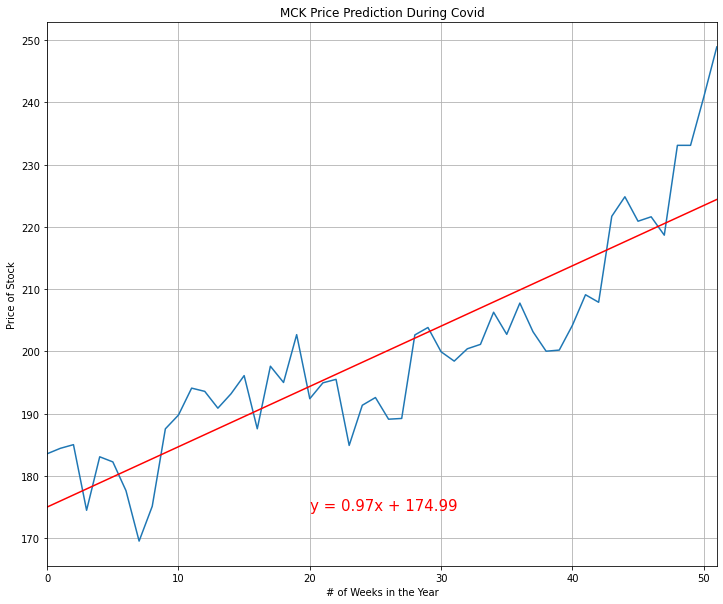

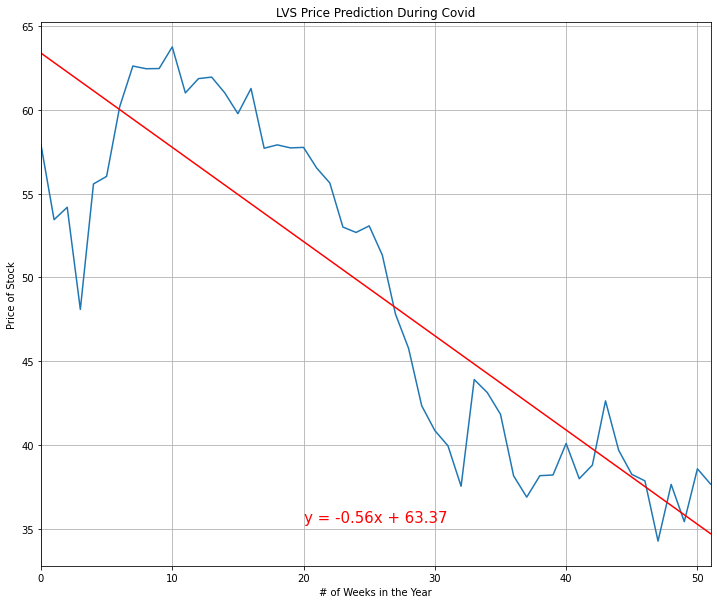

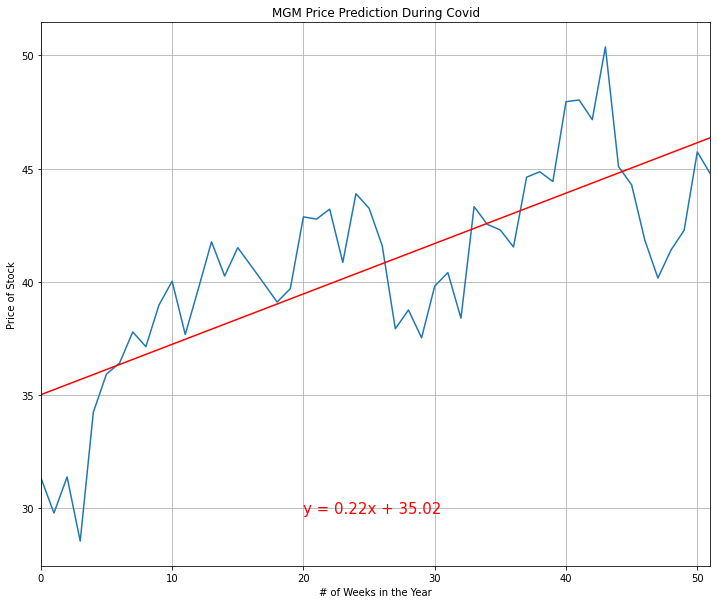

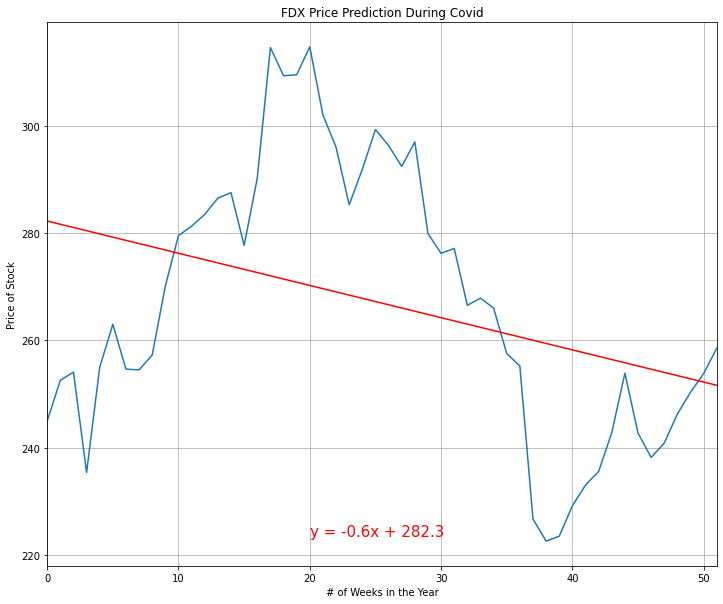

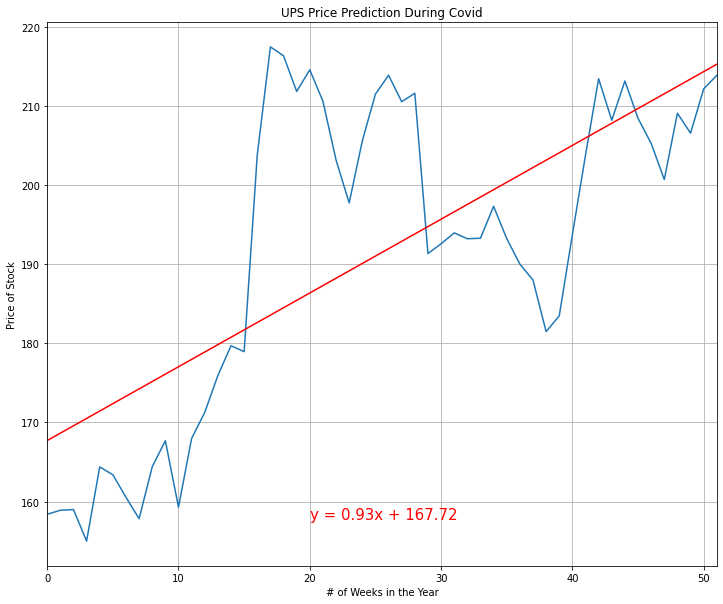

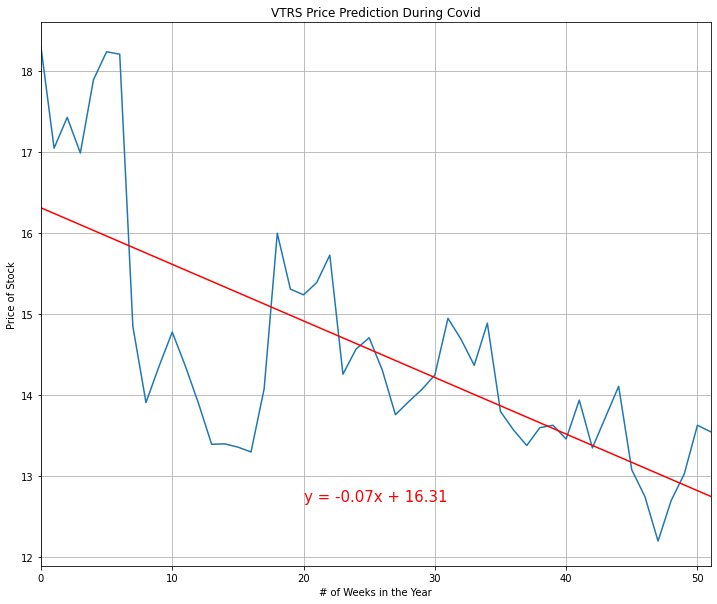

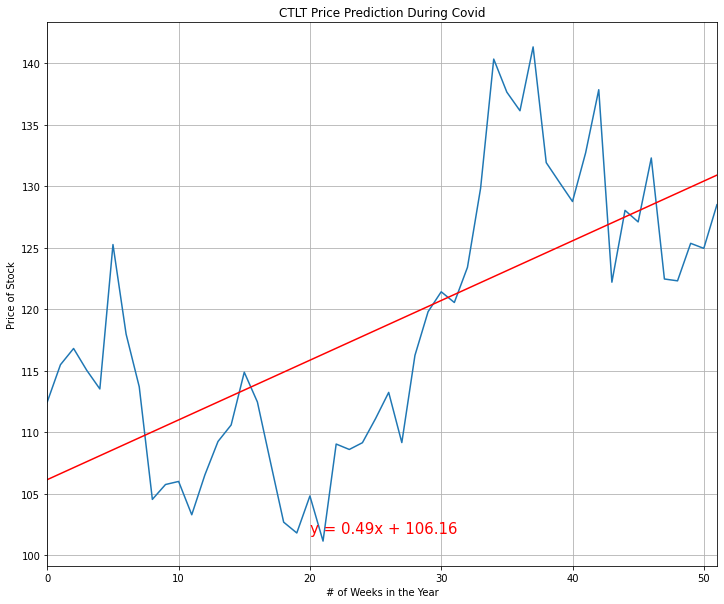

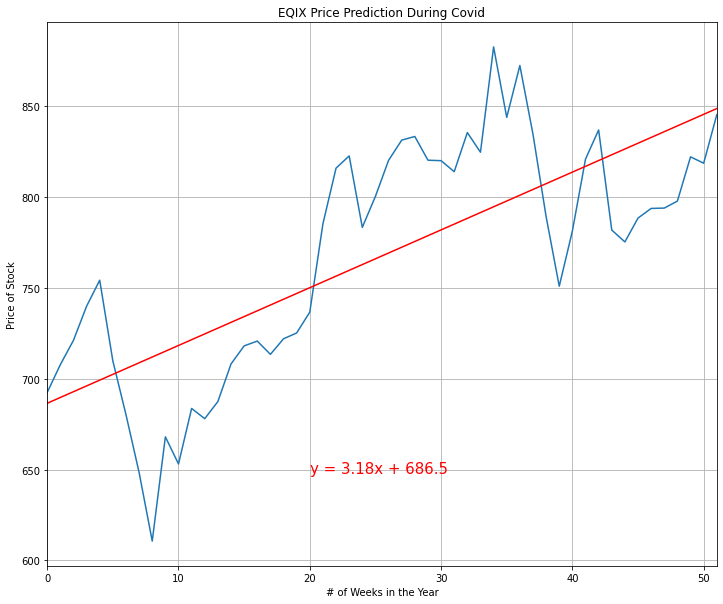

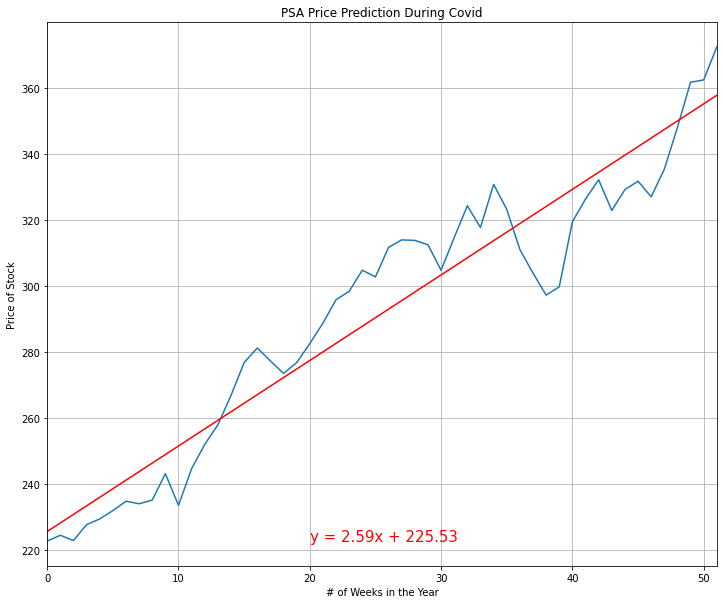

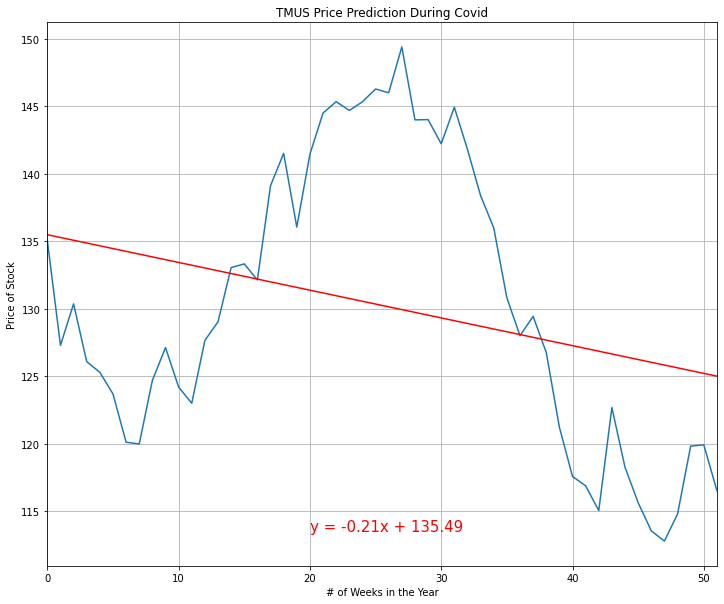

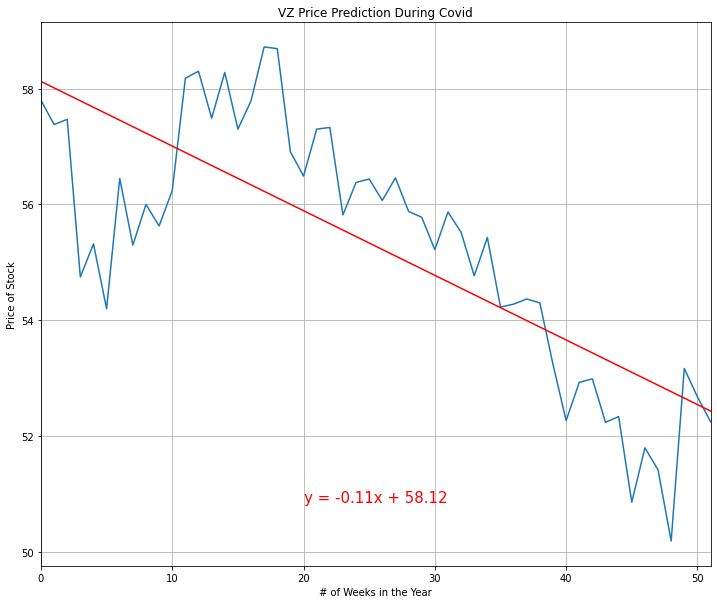

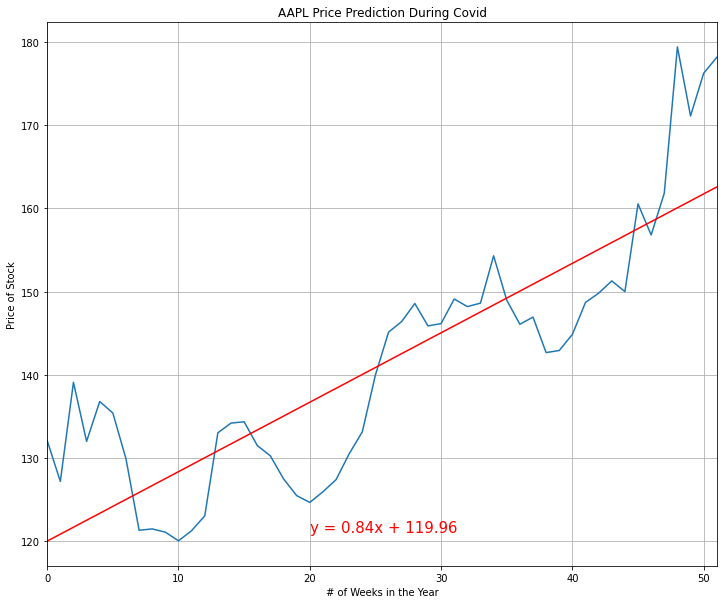

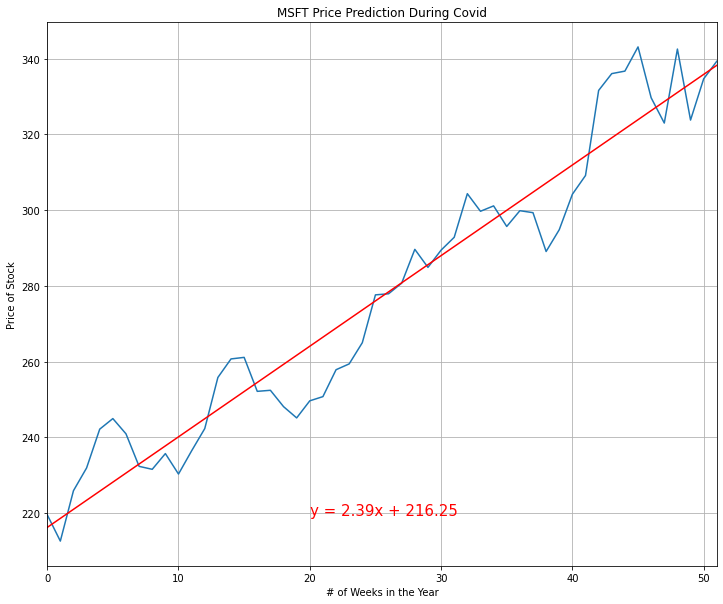

In [70]:
#creating x and y values to plot the linear regression to predict stock prices for the year of 2021
#x being the time(index) and y being the price; using a for loop to assign the x and y then plot
count = 0
for key in ticker_2021_data:
    #assigning values
    x_values = range(len(ticker_2021_data[key].index))
    y_values = ticker_2021_data[key]['Close']
    #get a relative y coord for each stock as the prices are different. By getting the minimum and then grabbing the 2nd to last should plot at a decent position.
    price_list = []
    for x in ticker_2021_data[key]['Close']:
        price_list.append(x)
        price_list.sort()
    price_list.pop(0)
    y_coord = price_list[0]
    #using lin regress function above
    plot_lin_regression(x_values, y_values, '# of Weeks in the Year', 'Price of Stock',tickers[count], 20, y_coord)
    plt.savefig(f'./Plotted_Images/2021_lin_regress/{tickers[count]}_lin_regress')
    count += 1

In [69]:
sector_ticker = []
for index, row in unbias_stock_df.iterrows():
    if index%2 == 0:
        sector_ticker.append(row['Ticker'])
print(sector_ticker)

['UAL', 'TSLA', 'CLX', 'ALGN', 'LVS', 'FDX', 'VTRS', 'EQIX', 'TMUS', 'AAPL']


## Covid Milestones we chose by date in 2020 are:
March 11 WHO(World Health Orginization) declares COVID-19 a pandemic<br>
March 15 States begin to implement shutdowns<br>
March 27 Trump Administration signs $2T COVID-19 relief bill<br>
April 13 Most states report widespread cases of COVID-19<br>
May 9 Unemployment rate hits record high 14.7%<br>
May 28 Deaths suprasses 100k<br>
July 7 Covid cases suprasses 3 million<br>
Sept 28 reported deaths surpasses 1 million worldwide<br>
Nov 18 Pfizer Vaccine is 95% effective<br>
Dec 11 FDA issues an EUA for Pfizer & recommended by ACIP for everyone 16+<br>
Dec 27 Trump Administration signs second Covid Relief Act<br>

In [83]:
def stock_df_day(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'D', beg_year, end_year))
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name

In [90]:
covid_tickers_2020 = {}
#loop through to get the daily chart of each ticker for 2020
for item in sector_ticker:
    covid_tickers_2020[f'{item}_covid'] = stock_df_day(item, beg_2020, end_2020).set_index('Time')

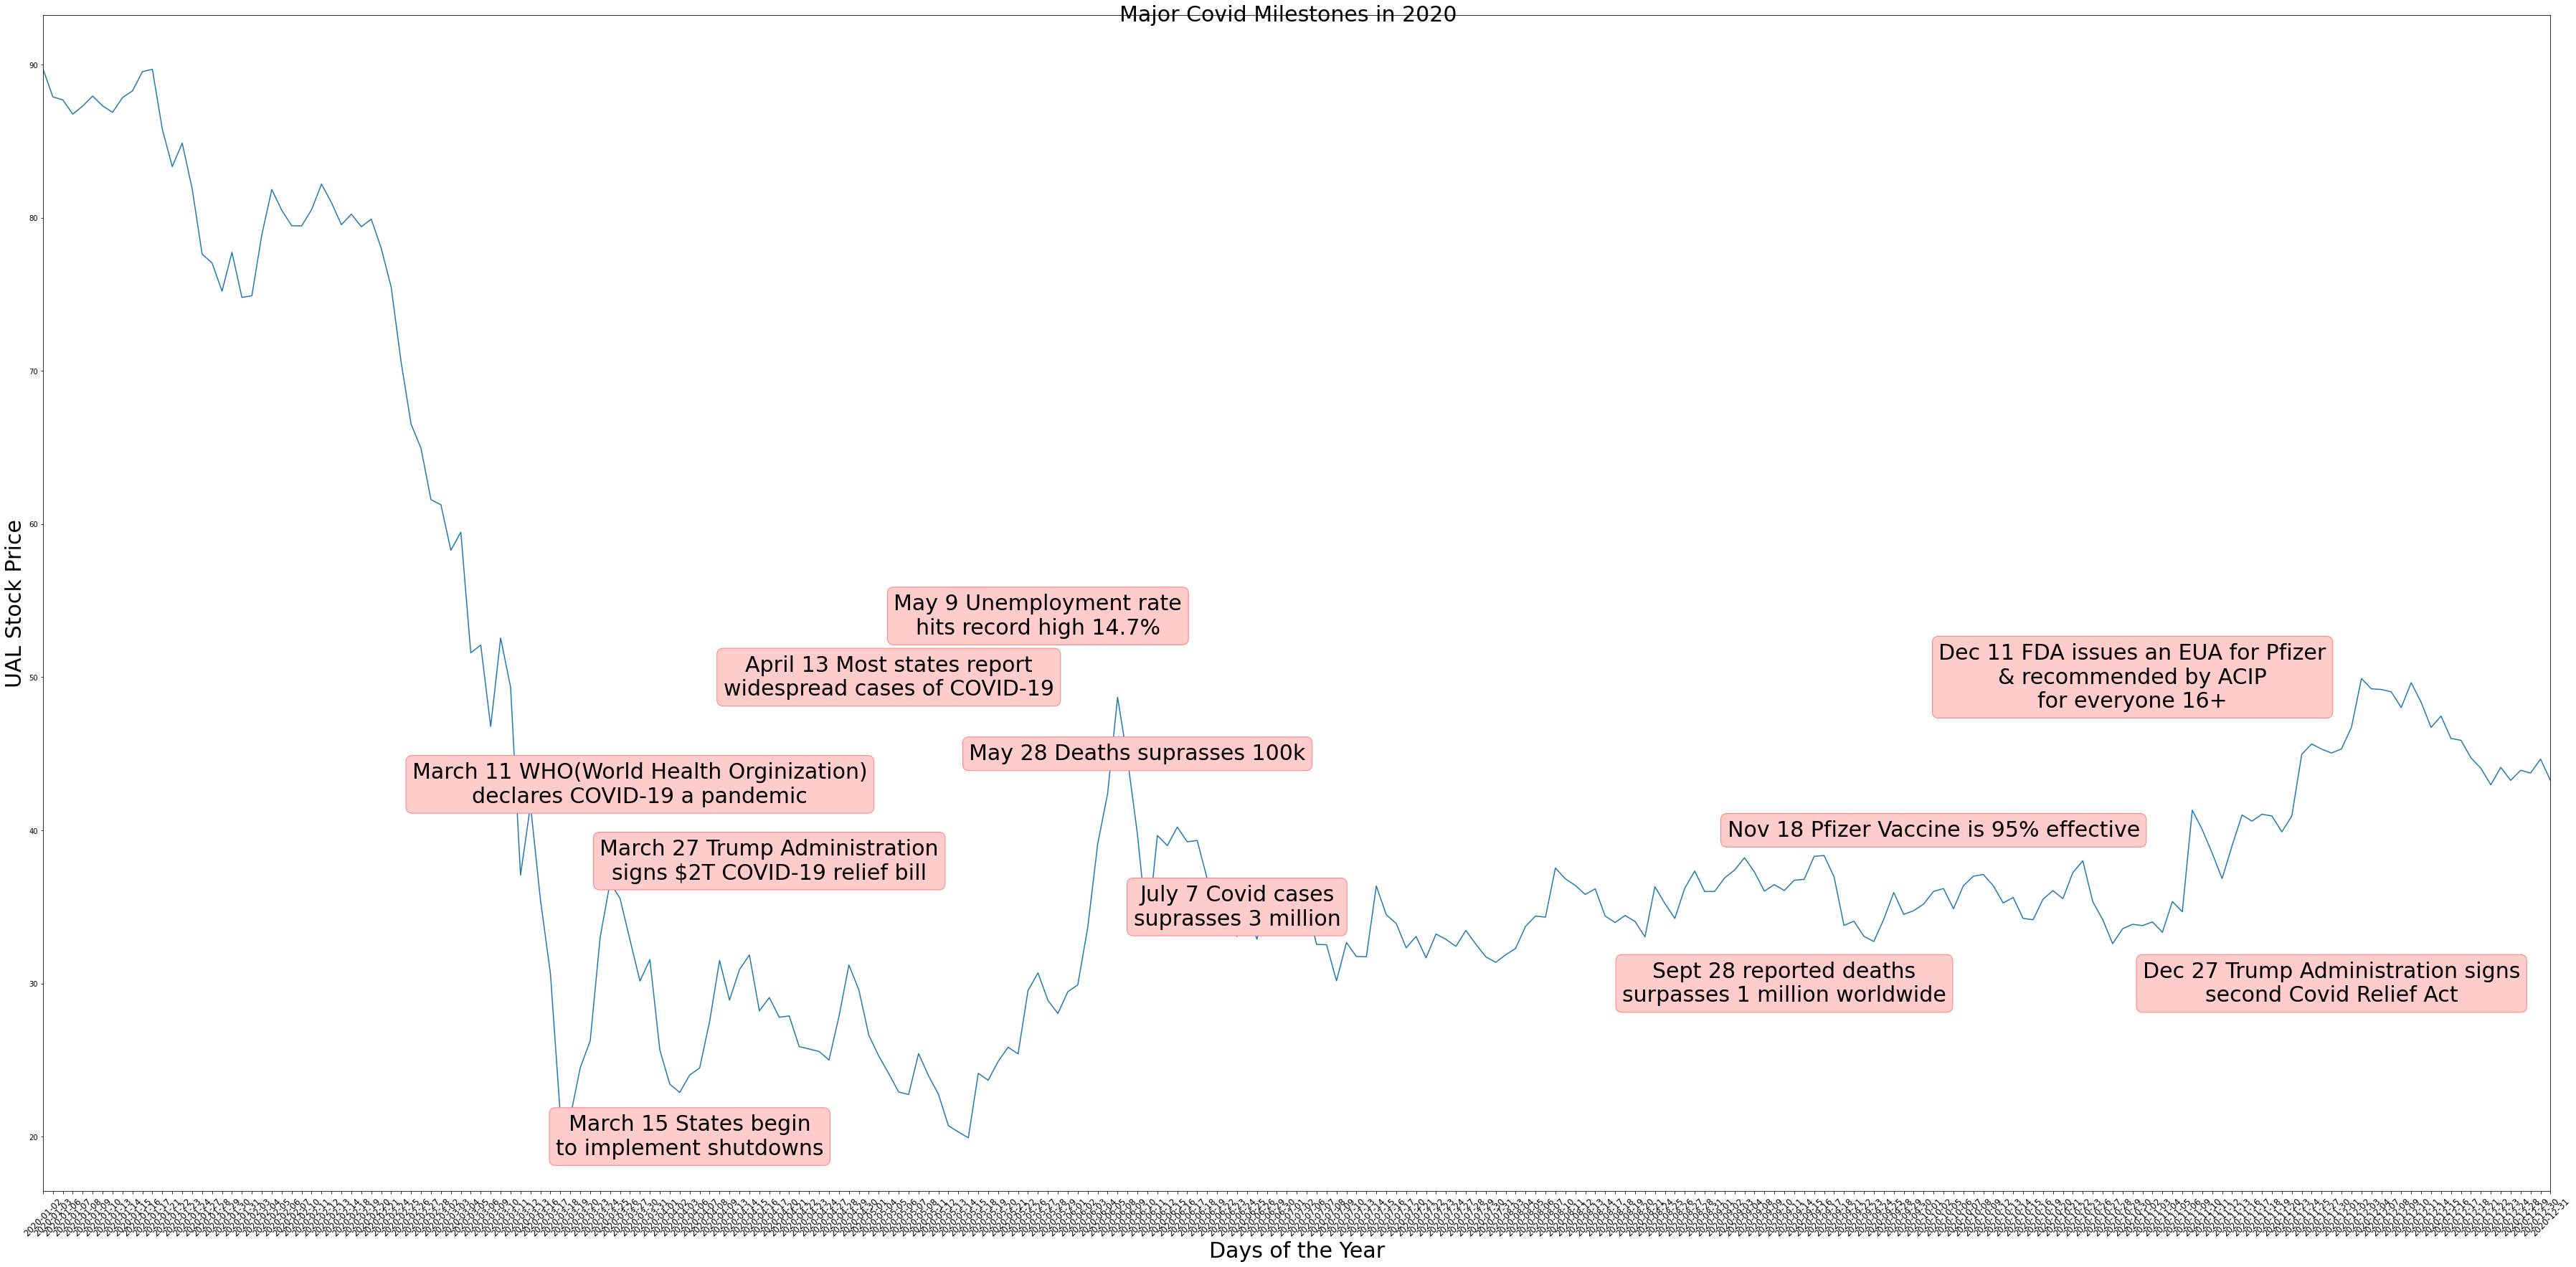

In [133]:
fig = plt.figure(figsize=(50,25))
plt.plot(covid_tickers_2020['UAL_covid'].index,covid_tickers_2020['UAL_covid']['Close'])
plt.text(60, 43, "March 11 WHO(World Health Orginization)\ndeclares COVID-19 a pandemic", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(65, 20, "March 15 States begin\nto implement shutdowns", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(73, 38, "March 27 Trump Administration\nsigns $2T COVID-19 relief bill", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(85, 50, "April 13 Most states report\nwidespread cases of COVID-19", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(100, 54, "May 9 Unemployment rate\nhits record high 14.7%", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(110, 45, "May 28 Deaths suprasses 100k", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(120, 35, "July 7 Covid cases\nsuprasses 3 million", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(175, 30, "Sept 28 reported deaths\nsurpasses 1 million worldwide", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(190, 40, "Nov 18 Pfizer Vaccine is 95% effective", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(210, 50, "Dec 11 FDA issues an EUA for Pfizer\n& recommended by ACIP\nfor everyone 16+", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(230, 30, "Dec 27 Trump Administration signs\nsecond Covid Relief Act", size=30,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.xticks(rotation=45, fontsize=12)
plt.xlim([min(covid_tickers_2020['UAL_covid'].index),max(covid_tickers_2020['UAL_covid'].index)])
plt.ylabel('UAL Stock Price', fontsize=30)
plt.xlabel('Days of the Year', fontsize=30)
fig.suptitle('Major Covid Milestones in 2020', fontsize=30)
plt.tight_layout();
plt.savefig('./Plotted_Images/covid_milestones')